<a href="https://colab.research.google.com/github/albuquerquehellen/precificacaoesatisfacao/blob/main/Precifica%C3%A7%C3%A3o_e_Satisfa%C3%A7%C3%A3o_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
produtos = pd.read_csv('/content/drive/MyDrive/Laboratoria/Projeto 4/amazon_dataset/amazon - amazon_product.csv')

In [ ]:
avaliações = pd.read_csv('/content/drive/MyDrive/Laboratoria/Projeto 4/amazon_dataset/amazon - amazon_review.csv')

In [ ]:
null_counts_produtos = produtos.isnull().sum()
print("Nulos em amazon_product:\n", null_counts_produtos)
pct_null_produtos = (produtos.isnull().mean() * 100).round(2)
print("Percentual de nulos em amazon_product:\n", pct_null_produtos)

Nulos em amazon_product:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
about_product          4
dtype: int64
Percentual de nulos em amazon_product:
 product_id             0.00
product_name           0.00
category               0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
about_product          0.27
dtype: float64


In [ ]:
null_counts_avaliações = avaliações.isnull().sum()
print("Nulos em amazon_reviews:\n", null_counts_avaliações)
pct_null_avaliações = (avaliações.isnull().mean() * 100).round(2)
print("Percentual de nulos em amazon_reviews:\n", pct_null_avaliações)

Nulos em amazon_reviews:
 user_id             0
user_name           0
review_id           0
review_title        0
review_content      0
img_link          466
product_link      466
product_id          0
rating              0
rating_count        2
dtype: int64
Percentual de nulos em amazon_reviews:
 user_id            0.00
user_name          0.00
review_id          0.00
review_title       0.00
review_content     0.00
img_link          31.81
product_link      31.81
product_id         0.00
rating             0.00
rating_count       0.14
dtype: float64


In [ ]:
# máscaras de nulo
mask_prod_null = avaliações['product_link'].isnull()
mask_img_null  = avaliações['img_link'].isnull()

# linhas onde AMBAS são nulas
both_null = avaliações[mask_prod_null & mask_img_null]
print("Linhas com product_link E img_link nulos:", both_null.shape[0])

# linhas com apenas product_link nulo
prod_only_null = avaliações[mask_prod_null & ~mask_img_null]
print("Linhas com apenas product_link nulo:", prod_only_null.shape[0])

# linhas com apenas img_link nulo
img_only_null = avaliações[~mask_prod_null & mask_img_null]
print("Linhas com apenas img_link nulo:", img_only_null.shape[0])

# debug: se quiser ver os índices exatos
print("Índices com ambos nulos:", both_null.index.tolist())


Linhas com product_link E img_link nulos: 466
Linhas com apenas product_link nulo: 0
Linhas com apenas img_link nulo: 0
Índices com ambos nulos: [999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 114

In [ ]:
# Converte a coluna rating para float
avaliações['rating'] = pd.to_numeric(avaliações['rating'], errors='coerce')

# Agora pode seguir com o agrupamento
avaliações['tem_link'] = avaliações['product_link'].notnull()
media_rating_por_link = avaliações.groupby('tem_link')['rating'].mean()

print(media_rating_por_link)


tem_link
False    4.041720
True     4.122122
Name: rating, dtype: float64


In [ ]:
# Cria uma flag indicando se o produto tem ou não descrição
produtos['tem_about'] = produtos['about_product'].notnull()

# Faz o merge das tabelas usando product_id
avaliações_merged = avaliações.merge(produtos[['product_id', 'tem_about']], on='product_id', how='left')

# Converte rating para numérico se ainda não tiver feito
avaliações_merged['rating'] = pd.to_numeric(avaliações_merged['rating'], errors='coerce')

# Calcula a média de rating para produtos com e sem descrição
media_rating_about = avaliações_merged.groupby('tem_about')['rating'].mean()

print(media_rating_about)


tem_about
False    4.000000
True     4.106221
Name: rating, dtype: float64


In [ ]:
# Verificar duplicatas de product_id
produtos.duplicated(subset='product_id').sum()

np.int64(118)

In [ ]:
# Ver duplicatas completas (linhas 100% iguais)
produtos[produtos.duplicated(subset=produtos.columns, keep=False)]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,tem_about
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,High Compatibility : Compatible With iPhone 12...,True
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,"Compatible with all Type C enabled devices, be...",True
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,The boAt Deuce USB 300 2 in 1 cable is compati...,True
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,[CHARGE & SYNC FUNCTION]- This cable comes wit...,True
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,Fast Charging & Data Sync: Solero TB301 Type-C...,True
...,...,...,...,...,...,...,...,...
1007,B0B9BXKBC7,"WeCool S5 Long Selfie Stick, with Large Reinfo...",Electronics|Mobiles&Accessories|MobileAccessor...,"₹1,799","₹3,999",55%,"64"" Tall Cell Phone Tripods with 7 section adj...",True
1010,B07GVGTSLN,Wayona Usb Type C Fast Charger Cable Fast Char...,Computers&Accessories|Accessories&Peripherals|...,₹325,"₹1,299",75%,Fast Charge & Data Sync: Fast charge& data tra...,True
1017,B0B9BD2YL4,KINGONE Wireless Charging Pencil (2nd Generati...,Electronics|Mobiles&Accessories|MobileAccessor...,"₹2,599","₹6,999",63%,【2022 latest iPad Magnetic Charging】 The lates...,True
1018,B0BMXMLSMM,Lapster 65W compatible for OnePlus Dash Warp C...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,-1 meter type c to c cable fast charging cable...,True


In [ ]:
produtos = produtos.drop_duplicates()

In [ ]:
produtos.duplicated(subset='product_id').sum()

np.int64(12)

In [ ]:
# Ver quais são os IDs duplicados
ids_duplicados = produtos[produtos.duplicated(subset='product_id', keep=False)].sort_values('product_id')

# Visualizar essas linhas
ids_duplicados

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,tem_about
1466,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,NaN,False
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,International design and styling|Two heat sett...,True
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,Fan sweep area: 230 MM ; Noise level: (40 - 45...,True
1467,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,NaN,False
1468,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,NaN,False
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,"Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...",True
1465,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,NaN,False
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,"230 Volts, 400 watts, 1 Year",True
433,B07DJLFMPS,HP 32GB Class 10 MicroSD Memory Card (U1 TF Ca...,Electronics|Accessories|MemoryCards|MicroSD,₹369,"₹1,600",77%,HP 32GB Class 10 MicroSD Memory Card (U1 TF Ca...,True
686,B07DJLFMPS,HP 32GB Class 10 MicroSD Memory Card (U1 TF Ca...,Electronics|Accessories|MemoryCards|MicroSD,₹369,"₹1,600",77%,"Class 10, UHS-I, U1 Memory Card with Adapter|P...",True


In [ ]:
# Remover duplicatas priorizando os registros com about_product preenchido
produtos = produtos.sort_values(by='about_product', na_position='last')
produtos = produtos.drop_duplicates(subset='product_id', keep='first')

In [ ]:
produtos.duplicated(subset='product_id').sum()

np.int64(0)

In [ ]:
avaliações.duplicated(subset='review_id').sum()

np.int64(271)

In [ ]:
avaliações.duplicated().sum()

np.int64(0)

In [ ]:
avaliações[avaliações.duplicated(subset='review_id', keep=False)].sort_values(by='review_id')

,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count,tem_link
1010,"AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZFXI...","Sunil Funde,Biju Abraham Thomas,Samir,Rahul Sh...","R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R26...","Nice product .,Good quality Braided cable, VFM...","Sturdy packing, good product!,Have used this b...",NaN,NaN,B07GVGTSLN,4.2,"10,576",False
84,"AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZFXI...","Sunil Funde,Biju Abraham Thomas,Samir,Rahul Sh...","R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R26...","Nice product .,Good quality Braided cable, VFM...","Sturdy packing, good product!,Have used this b...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Cable-Braided-Cha...,B07GVGTSLN,4.2,"10,576",True
261,"AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZFXI...","Sunil Funde,Biju Abraham Thomas,Samir,Rahul Sh...","R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R26...","Nice product .,Good quality Braided cable, VFM...","Sturdy packing, good product!,Have used this b...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Charger-Samsung-G...,B07F1P8KNV,4.2,"10,576",True
523,"AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MXFD...","Ranit Barman,Ravi Singh,Karan Rai,Amazon Custo...","R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI,R...","Works well, but not for long,Good product,Good...","The sound quality is excellent for the price, ...",https://m.media-amazon.com/images/I/31+GLbqRPt...,https://www.amazon.in/Samsung-Original-EHS64AV...,B01F262EUU,4.2,"31,539",True
466,"AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MXFD...","Ranit Barman,Ravi Singh,Karan Rai,Amazon Custo...","R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI,R...","Works well, but not for long,Good product,Good...","The sound quality is excellent for the price, ...",https://m.media-amazon.com/images/I/31FzYVC62w...,https://www.amazon.in/Samsung-Original-EHS64AV...,B01F25X6RQ,4.2,"31,539",True
...,...,...,...,...,...,...,...,...,...,...,...
492,"AH7LW3BCJBLCZTMWBOFL33UGIRBQ,AFSJYBGBY2U6KAAUR...","anurag,Nirmal Singh,Vikas Keshavrao Vanave,K. ...","RZ7HZPPMZP6NJ,R3UU1TR7386E57,R3IX0H9MIZUJNR,R1...",just a watch not smart one... all features are...,just a watch not smart one... all features are...,https://m.media-amazon.com/images/I/41BDYVKRmW...,https://www.amazon.in/PTron-Force-Bluetooth-Sm...,B0B53NXFFR,3.3,"4,415",True
506,"AH7LW3BCJBLCZTMWBOFL33UGIRBQ,AFSJYBGBY2U6KAAUR...","anurag,Nirmal Singh,Vikas Keshavrao Vanave,K. ...","RZ7HZPPMZP6NJ,R3UU1TR7386E57,R3IX0H9MIZUJNR,R1...",just a watch not smart one... all features are...,just a watch not smart one... all features are...,https://m.media-amazon.com/images/I/41GXZy6dLI...,https://www.amazon.in/PTron-Force-Bluetooth-Sm...,B0B53QLB9H,3.3,"4,415",True
62,"AF42EMTPEJAL4LNEPPX77TN77UHA,AHBMZRY43T2GTYDVN...","pruthvi natraj,Phani,Amazon Customer,TechDevot...","RZJR37WFGXR9B,R39X6O18GM16TM,R18ZQ09EKVWZ9R,R3...","A well-priced product.,Lenthy cord.,Product is...","i am writing this review after 2 months, the f...",https://m.media-amazon.com/images/I/310WOJIrwj...,https://www.amazon.in/Lapster-Type-Cable-compu...,B0994GFWBH,4.0,"1,313",True
938,"AF42EMTPEJAL4LNEPPX77TN77UHA,AHBMZRY43T2GTYDVN...","pruthvi natraj,Phani,Amazon Customer,TechDevot...","RZJR37WFGXR9B,R39X6O18GM16TM,R18ZQ09EKVWZ9R,R3...","A well-priced product.,Lenthy cord.,Product is...","i am writing this review after 2 months, the f...",https://m.media-amazon.com/images/I/310WOJIrwj...,https://www.amazon.in/Lapster-Type-Cable-compu...,B0994GFWBH,4.0,"1,313",True


In [ ]:
# Ordena para priorizar linhas com links (tem_link=True)
avaliações_sorted = avaliações.sort_values(by='tem_link', ascending=False)

# Remove duplicatas pelo review_id, mantendo a primeira (que tem link)
avaliações_limpa = avaliações_sorted.drop_duplicates(subset='review_id', keep='first')


In [ ]:
len(avaliações_limpa)

1194

In [ ]:
len(produtos)

1351

In [ ]:
categorias = produtos['category'].value_counts()
categorias_sorted = categorias.sort_index()
pd.set_option('display.max_rows', None)
print(categorias_sorted)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                       1
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                      2
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                              1
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                           2
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                              2
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams                           2
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                                   2
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|DVICables                     

In [ ]:
# Extrair os dois primeiros níveis da categoria
produtos['category_simplificada'] = produtos['category'].apply(lambda x: '|'.join(x.split('|')[:2]) if pd.notnull(x) else x)

# Verificar as categorias resultantes e suas contagens
categorias_simplificadas = produtos['category_simplificada'].value_counts().sort_index()

# Agrupar categorias com 5 ou menos como 'Outros'
frequencias = produtos['category_simplificada'].value_counts()
categorias_rare = frequencias[frequencias <= 5].index
produtos['category_simplificada'] = produtos['category_simplificada'].replace(categorias_rare, 'Outros')

# Verificar resultado final
print(produtos['category_simplificada'].value_counts().sort_values(ascending=False))

category_simplificada
Home&Kitchen|Kitchen&HomeAppliances                    308
Computers&Accessories|Accessories&Peripherals          307
Electronics|HomeTheater,TV&Video                       156
Electronics|Mobiles&Accessories                        151
Home&Kitchen|Heating,Cooling&AirQuality                116
Electronics|Headphones,Earbuds&Accessories              63
Electronics|WearableTechnology                          62
Computers&Accessories|NetworkingDevices                 30
OfficeProducts|OfficePaperProducts                      27
Outros                                                  22
Computers&Accessories|ExternalDevices&DataStorage       18
Electronics|Cameras&Photography                         16
Home&Kitchen|HomeStorage&Organization                   16
Electronics|HomeAudio                                   16
Electronics|GeneralPurposeBatteries&BatteryChargers     14
Electronics|Accessories                                 11
Computers&Accessories|Printers,Ink

In [ ]:
# Cria cópia da base original antes de modificar
produtos_orig = produtos.copy()

In [ ]:
# Valores que não são convertíveis para número na coluna 'discounted_price'
nao_numericos = produtos_orig[~produtos_orig['discounted_price'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print(nao_numericos['discounted_price'].unique())

['₹1,299' '₹339' '₹199' '₹115' '₹279' '₹149' '₹230' '₹479' '₹120' '₹949'
 '₹129' '₹599' '₹399' '₹1,182' '₹587' '₹159' '₹2,499' '₹320' '₹368' '₹970'
 '₹1,799' '₹1,260' '₹664' '₹5,998' '₹1,999' '₹1,599' '₹1,110' '₹2,799'
 '₹4,499' '₹499' '₹1,199' '₹235' '₹90' '₹200' '₹549' '₹609' '₹809'
 '₹1,149' '₹717' '₹3,190' '₹999' '₹1,679' '₹12,490' '₹298' '₹749' '₹349'
 '₹10,389' '₹5,999' '₹229' '₹7,499' '₹3,710' '₹474' '₹899' '₹299'
 '₹273.10' '₹1,099' '₹1,499' '₹2,286' '₹784' '₹2,049' '₹6,299' '₹649'
 '₹2,280' '₹10,099' '₹1,815' '₹2,099' '₹522' '₹1,990' '₹2,199' '₹269'
 '₹228' '₹160' '₹2,299' '₹849' '₹8,499' '₹7,998' '₹179' '₹570' '₹478'
 '₹13,999' '₹15,499' '₹50' '₹250' '₹2,449' '₹1,235' '₹1,699' '₹3,349'
 '₹37,990' '₹15,490' '₹12,999' '₹10,999' '₹8,699' '₹1,529' '₹3,249'
 '₹9,199' '₹2,088' '₹575' '₹169' '₹379' '₹263' '₹699' '₹1,624' '₹289'
 '₹449' '₹272' '₹2,599' '₹770' '₹745' '₹1,484' '₹79' '₹417.44' '₹489'
 '₹689' '₹799' '₹2,998' '₹559' '₹2,999' '₹1,324' '₹889' '₹225' '₹1,089'
 '₹308' '₹1,625

In [ ]:
# Função para limpar o texto do preço
def limpar_preco(preco_str):
    if pd.isna(preco_str):
        return preco_str
    preco_limpo = str(preco_str).replace('₹', '').replace(',', '').replace('%', '').strip()
    return preco_limpo

# Aplicar a limpeza nas colunas
for col in ['actual_price', 'discounted_price', 'discount_percentage']:
    produtos[col] = produtos[col].apply(limpar_preco)

# Agora converter para float
for col in ['actual_price', 'discounted_price', 'discount_percentage']:
    produtos[col] = pd.to_numeric(produtos[col], errors='coerce')

In [ ]:
# Converter colunas numéricas para float (forçando erros para NaN)
colunas_numericas_produtos = ['actual_price', 'discounted_price', 'discount_percentage']

for coluna in colunas_numericas_produtos:
    produtos[coluna] = pd.to_numeric(produtos[coluna], errors='coerce')

colunas_numericas_produtos = ['actual_price', 'discounted_price', 'discount_percentage']

for coluna in colunas_numericas_produtos:
    Q1 = produtos[coluna].quantile(0.25)
    Q3 = produtos[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = produtos[(produtos[coluna] < limite_inferior) | (produtos[coluna] > limite_superior)]

    print(f'Coluna: {coluna}')
    print(f'Qtd de outliers: {outliers.shape[0]}\n')


Coluna: actual_price
Qtd de outliers: 185

Coluna: discounted_price
Qtd de outliers: 209

Coluna: discount_percentage
Qtd de outliers: 0



In [ ]:
# Converter a coluna rating para numérico, caso não esteja
avaliações['rating'] = pd.to_numeric(avaliações['rating'], errors='coerce')

# Calcular outliers usando IQR para a coluna rating
Q1 = avaliações['rating'].quantile(0.25)
Q3 = avaliações['rating'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Verificar quantidade de outliers
outliers_rating = avaliações[(avaliações['rating'] < limite_inferior) | (avaliações['rating'] > limite_superior)]
print(f'Qtd de outliers em rating: {outliers_rating.shape[0]}')

# Exibir algumas colunas relevantes para inspeção manual
print(outliers_rating[['product_id', 'rating']])


Qtd de outliers em rating: 74
      product_id  rating
45    B07XJYYH7L     3.3
82    B08QX1CC14     3.4
117   B08RP2L2NL     3.5
142   B08RX8G496     3.2
154   B0117H7GZ6     3.4
174   B0BP7XLX48     5.0
179   B08XMSKKMM     3.3
211   B08RHPDNVV     3.5
233   B07V5YF4ND     3.5
236   B097ZQTDVZ     3.4
263   B09F6D21BY     3.0
275   B09LV13JFB     3.3
282   B0B94JPY2N     3.0
284   B08RZ12GKR     3.5
290   B09TY4MSH3     3.3
312   B097JVLW3L     3.5
318   B09P8M18QM     3.3
324   B0BQRJ3C47     5.0
415   B085W8CFLH     3.5
463   B0B53QFZPY     3.3
487   B0BGSV43WY     3.5
492   B0B53NXFFR     3.3
506   B0B53QLB9H     3.3
541   B0B7DHSKS7     3.5
545   B0BBVKRP7B     2.8
550   B0B82YGCF6     3.0
592   B0B72BSW7K     3.5
597   B07T5DKR5D     3.5
627   B08YDFX7Y1     3.5
629   B087FXHB6J     3.5
645   B00MFPCY5C     3.5
666   B07PLHTTB4     3.5
744   B097JQ1J5G     3.4
746   B08VRMK55F     3.4
772   B08HD7JQHX     3.3
775   B09ZHCJDP1     5.0
841   B084BR3QX8     3.5
857   B07XJYYH7L    

In [ ]:
# Verificando tipos de dados em produtos
print("Tipos de dados em produtos:")
print(produtos.dtypes)

# Verificando tipos de dados em avaliações
print("\nTipos de dados em avaliações:")
print(avaliações.dtypes)

Tipos de dados em produtos:
product_id                object
product_name              object
category                  object
discounted_price         float64
actual_price             float64
discount_percentage        int64
about_product             object
tem_about                   bool
category_simplificada     object
dtype: object

Tipos de dados em avaliações:
user_id            object
user_name          object
review_id          object
review_title       object
review_content     object
img_link           object
product_link       object
product_id         object
rating            float64
rating_count       object
tem_link             bool
dtype: object


In [ ]:
def limpar_rating_count(valor):
    if pd.isna(valor):
        return valor
    # Remove espaços, vírgulas, e outros caracteres não numéricos que podem aparecer
    valor_str = str(valor).replace(',', '').strip()
    # Se ainda tiver algo não numérico, pode tentar extrair só os dígitos:
    if not valor_str.isdigit():
        # Exemplo: extrair apenas números
        import re
        numeros = re.findall(r'\d+', valor_str)
        if numeros:
            return int(numeros[0])
        else:
            return None
    return int(valor_str)

avaliações['rating_count'] = avaliações['rating_count'].apply(limpar_rating_count)

# Agora converter para inteiro (Int64 suporta NaNs)
avaliações['rating_count'] = pd.to_numeric(avaliações['rating_count'], errors='coerce').astype('Int64')

print(avaliações['rating_count'].isnull().sum())

2


In [ ]:
# Converter rating_count para numérico (coercion transforma erros em NaN)
avaliações['rating_count'] = pd.to_numeric(avaliações['rating_count'], errors='coerce')

# Se quiser, pode verificar se há nulos antes
print(avaliações['rating_count'].isnull().sum())

# Converter para inteiro (Int64 permite nulos — diferente de int64)
avaliações['rating_count'] = avaliações['rating_count'].astype('Int64')

# Confirmar o tipo
print(avaliações['rating_count'].dtype)

2
Int64


In [ ]:
# Verificando tipos de dados em produtos
print("Tipos de dados em produtos:")
print(produtos.dtypes)

# Verificando tipos de dados em avaliações
print("\nTipos de dados em avaliações:")
print(avaliações.dtypes)

Tipos de dados em produtos:
product_id                object
product_name              object
category                  object
discounted_price         float64
actual_price             float64
discount_percentage        int64
about_product             object
tem_about                   bool
category_simplificada     object
dtype: object

Tipos de dados em avaliações:
user_id            object
user_name          object
review_id          object
review_title       object
review_content     object
img_link           object
product_link       object
product_id         object
rating            float64
rating_count        Int64
tem_link             bool
dtype: object


In [ ]:
# Verifica duplicados
print(produtos.duplicated(subset='product_id').sum())

0


In [ ]:
colunas_numericas = ['actual_price', 'discounted_price', 'discount_percentage']
for col in colunas_numericas:
    produtos[col] = pd.to_numeric(produtos[col], errors='coerce')

In [ ]:
produtos['tem_about'] = produtos['about_product'].notnull()

In [ ]:
# Extrair os dois primeiros níveis da categoria
produtos['category_simplificada'] = produtos['category'].apply(
    lambda x: '|'.join(x.split('|')[:2]) if pd.notnull(x) else x
)

# Agrupar categorias com 5 ou menos ocorrências como 'Outros'
freq_cats = produtos['category_simplificada'].value_counts()
cats_raras = freq_cats[freq_cats <= 5].index
produtos['category_simplificada'] = produtos['category_simplificada'].replace(cats_raras, 'Outros')


In [ ]:
print(produtos.isnull().sum())

product_id               0
product_name             0
category                 0
discounted_price         0
actual_price             0
discount_percentage      0
about_product            0
tem_about                0
category_simplificada    0
dtype: int64


In [ ]:
print(avaliações_limpa.duplicated(subset='review_id').sum())

0


In [ ]:
avaliações_limpa['rating'] = pd.to_numeric(avaliações['rating'], errors='coerce')
avaliações_limpa['rating_count'] = pd.to_numeric(avaliações['rating_count'], errors='coerce')  # se necessário

/tmp/ipython-input-40-2344279884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avaliações_limpa['rating'] = pd.to_numeric(avaliações['rating'], errors='coerce')
/tmp/ipython-input-40-2344279884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avaliações_limpa['rating_count'] = pd.to_numeric(avaliações['rating_count'], errors='coerce')  # se necessário


In [ ]:
avaliações_limpa['tem_link'] = avaliações['product_link'].notnull()

/tmp/ipython-input-41-2986615116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avaliações_limpa['tem_link'] = avaliações['product_link'].notnull()


In [ ]:
print(avaliações_limpa.isnull().sum())

user_id             0
user_name           0
review_id           0
review_title        0
review_content      0
img_link          460
product_link      460
product_id          0
rating              1
rating_count        2
tem_link            0
dtype: int64


In [ ]:
# Mostrar linhas com rating nulo como tabela
display(avaliações_limpa[avaliações_limpa['rating'].isnull()])

# Mostrar linhas com rating_count nulo como tabela
display(avaliações_limpa[avaliações_limpa['rating_count'].isnull()])

,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count,tem_link
1279,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",NaN,NaN,B08L12N5H1,NaN,992,False


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count,tem_link
282,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...,B0B94JPY2N,3.0,<NA>,True
324,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...,B0BQRJ3C47,5.0,<NA>,True


In [ ]:
quantidade = avaliações_limpa[avaliações_limpa['product_id'] == 'B0B94JPY2N'].shape[0]
print(f"O produto B0B94JPY2N tem {quantidade} avaliações.")


O produto B0B94JPY2N tem 1 avaliações.


In [ ]:
quantidade = avaliações_limpa[avaliações_limpa['product_id'] == 'B0BQRJ3C47'].shape[0]
print(f"O produto B0BQRJ3C47 tem {quantidade} avaliações.")

O produto B0BQRJ3C47 tem 1 avaliações.


In [ ]:
produtos_ajustar = ['B0BQRJ3C47', 'B0B94JPY2N']

avaliações_limpa.loc[
    (avaliações_limpa['product_id'].isin(produtos_ajustar)) & (avaliações_limpa['rating_count'].isnull()),
    'rating_count'
] = 1


In [ ]:
print(avaliações_limpa.loc[avaliações_limpa['product_id'].isin(produtos_ajustar), ['product_id', 'rating_count']])


     product_id  rating_count
282  B0B94JPY2N             1
324  B0BQRJ3C47             1


In [ ]:
quantidade = avaliações_limpa[avaliações_limpa['product_id'] == 'B08L12N5H1'].shape[0]
print(f"O produto B08L12N5H1	 tem {quantidade} avaliações.")

O produto B08L12N5H1	 tem 1 avaliações.


In [ ]:
avaliações_limpa = avaliações_limpa[~((avaliações_limpa['product_id'] == 'B08L12N5H1') & (avaliações_limpa['rating'].isna()))].reset_index(drop=True)


In [ ]:
print(avaliações_limpa.isnull().sum())

user_id             0
user_name           0
review_id           0
review_title        0
review_content      0
img_link          459
product_link      459
product_id          0
rating              0
rating_count        0
tem_link            0
dtype: int64


In [ ]:
# Conjuntos únicos de product_id em cada dataframe
produtos_ids = set(produtos['product_id'].unique())
avaliacoes_ids = set(avaliações_limpa['product_id'].unique())

# Verificar quais product_id em produtos NÃO aparecem em avaliacoes_limpa
produtos_sem_avaliacoes = produtos_ids - avaliacoes_ids

print(f"Quantidade de produtos sem avaliações: {len(produtos_sem_avaliacoes)}")
print("Produtos sem avaliações:")
print(produtos_sem_avaliacoes)

Quantidade de produtos sem avaliações: 162
Produtos sem avaliações:
{'B0B4HKH19N', 'B0B8ZWNR5T', 'B07MKFNHKG', 'B0BF4YBLPX', 'B084MZXJNK', 'B0B6F7LX4C', 'B01DF26V7A', 'B0BC8BQ432', 'B07GPXXNNG', 'B0B8CXTTG3', 'B09NVPJ3P4', 'B0B3NDPCS9', 'B07WJWRNVK', 'B0BDYW3RN3', 'B09XB8GFBQ', 'B07WDK3ZS6', 'B0B4F2ZWL3', 'B09GFM8CGS', 'B09QS9X9L8', 'B082LZGK39', 'B01F25X6RQ', 'B0B5D39BCD', 'B0B8SSC5D9', 'B08Y5KXR6Z', 'B0B4T6MR8N', 'B09T2S8X9C', 'B0859M539M', 'B09QS8V5N8', 'B09YDFDVNS', 'B08CT62BM1', 'B09TWH8YHM', 'B07LGT55SJ', 'B08QSDKFGQ', 'B08B42LWKN', 'B0B5CGTBKV', 'B0B3XXSB1K', 'B09LHYZ3GJ', 'B07JH1CBGW', 'B0BF563HB4', 'B09GFPVD9Y', 'B09GFLXVH9', 'B0088TKTY2', 'B0B4F52B5X', 'B092BJMT8Q', 'B095JPKPH3', 'B08PSQRW2T', 'B09YV4RG4D', 'B089WB69Y1', 'B0BMGB2TPR', 'B09QGZFBPM', 'B07WJV6P1R', 'B014I8SSD0', 'B08P9RYPLR', 'B09DSXK8JX', 'B0711PVX6Z', 'B07GQD4K6L', 'B09YLX91QR', 'B0B3N8VG24', 'B07WGPKMP5', 'B0B3CQBRB4', 'B07WGMMQGP', 'B08HVL8QN3', 'B08N1WL9XW', 'B09V17S2BG', 'B09VCHLSJF', 'B08K4RDQ71', 'B07PFJ

In [ ]:
# Contagem de avaliações por product_id
contagem_avaliacoes_por_produto = avaliações_limpa['product_id'].value_counts()

# Exibe os produtos que aparecem mais de uma vez
produtos_com_mais_de_uma_avaliacao = contagem_avaliacoes_por_produto[contagem_avaliacoes_por_produto > 1]

print(produtos_com_mais_de_uma_avaliacao)

product_id
B08WRBG3XW    2
B09ZQK9X8G    2
B077Z65HSD    2
B097R25DP7    2
Name: count, dtype: int64


In [ ]:
# Agrupa avaliações por product_id e calcula a média de rating e soma de rating_count
avaliacoes_agrupadas = avaliações_limpa.groupby('product_id').agg({
    'rating': 'mean',
    'rating_count': 'sum'
}).reset_index()


In [ ]:
import pandas as pd
from IPython.display import display

# Selecionar colunas relevantes das bases limpas
produtos_final = produtos[['product_id', 'category_simplificada', 'actual_price', 'discounted_price', 'discount_percentage']]
avaliacoes_final = avaliações_limpa[['review_id', 'user_id', 'product_id', 'rating', 'rating_count']]

# Realizar merge (inner join para garantir que só fiquem produtos com avaliações)
base_unificada = pd.merge(avaliacoes_final, produtos_final, on='product_id', how='inner')

# Reorganizar as colunas na ordem desejada
colunas_ordenadas = ['product_id', 'category_simplificada', 'actual_price', 'discounted_price', 'discount_percentage',
                     'review_id', 'user_id', 'rating', 'rating_count']

base_unificada = base_unificada[colunas_ordenadas]

# Exibir as primeiras 20 linhas como tabela
display(base_unificada.head(20))



,product_id,category_simplificada,actual_price,discounted_price,discount_percentage,review_id,user_id,rating,rating_count
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals,1099.0,399.00,64,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",4.2,24269
1,B0B12K5BPM,Electronics|HomeAudio,2299.0,1049.00,54,"R2F293IOSSP7QX,R35TMVD8F23NNK,R2RP81I94A906C,R...","AHUXD3GCY22BRMQLWN5ZEB3TGGAA,AEPHHPGRU3LZVJ3GO...",3.9,1779
2,B08WRWPM22,Computers&Accessories|Accessories&Peripherals,499.0,176.63,65,"R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...",4.1,15189
3,B00AXHBBXU,Outros,550.0,522.00,5,"R36XQGHL3TG2S2,R2KHO4ECNAVNOO,RHTRI5KXL3B0G,R1...","AHDNZMNGM6UT4M2VPRPLZ7EBWCOQ,AFI2AGCYNXV2A3SKA...",4.4,12179
4,B08MCD9JFY,Electronics|Cameras&Photography,1999.0,799.00,60,"R2UT2VQEDPGN1H,R1IIJGUS2SSR7Q,R3QMEGXUL7BM6J,R...","AH2OGGTXFZ6MSSCZB7IRRZPFOJLA,AFV6NBHT64FRQA3KR...",3.8,12958
5,B083RCTXLL,Computers&Accessories|Accessories&Peripherals,1199.0,681.00,43,"RMJTIHWOEVJ2S,R2EG04BF78FCDN,R2XS7O4CK0KEE5,RD...","AGQOIAAECVPLYNBEMZOCS6GKZWDA,AHGAVBUAPBB646EUC...",4.2,8258
6,B08HLZ28QC,Computers&Accessories|NetworkingDevices,3490.0,1199.00,66,"R3EGID2HUY7LU8,R27APYDW4ZMR7T,R31XXA5MOY1R4E,R...","AGT57G75IGN5AEBU77WPGOUYZMVA,AHQGD54SLGLEGF2ND...",4.1,11716
7,B07GVR9TG7,Computers&Accessories|NetworkingDevices,4999.0,2499.00,50,"R1KQN0FQ8TQUYP,R2LIHYNX33S3JW,R2MSZF0CBI5362,R...","AFZQFX2T6G3DRQ5VN2RLQHKHN7OQ,AEWQ6I7BKVHK5FWML...",4.4,35024
8,B0856HY85J,"Electronics|Headphones,Earbuds&Accessories",4999.0,1799.00,64,"R16XVVFYUNVL5L,R2MGT9GPFEHTPY,R326AAFTL0LMUL,R...","AEKZNJLC7X57UF3F4STP3GSIIGJA,AGPESHJAGFFNOORA7...",4.1,55192
9,B07CD2BN46,"Electronics|Headphones,Earbuds&Accessories",599.0,429.00,28,"R13Z8MSR50H9UK,RM7JUADWLUK6A,RKJS44FVJ9WDN,R3N...","AHMAO37N3VRBQR5QXRATTM75KHAQ,AHQ7LIIQZN6O7YA3E...",4.1,119466


In [ ]:
print(f"Quantidade de linhas na base unificada: {base_unificada.shape[0]}")

Quantidade de linhas na base unificada: 1193


In [ ]:
print(base_unificada.isnull().sum())

product_id               0
category_simplificada    0
actual_price             0
discounted_price         0
discount_percentage      0
review_id                0
user_id                  0
rating                   0
rating_count             0
dtype: int64


In [ ]:
# Agrupar por categoria simplificada e calcular médias/somas
resumo_categoria = base_unificada.groupby('category_simplificada').agg({
    'actual_price': 'mean',
    'discounted_price': 'mean',
    'discount_percentage': 'mean',
    'rating': 'mean',
    'rating_count': 'sum'
}).reset_index()

# Exibir como tabela no Colab
import pandas as pd
from IPython.display import display
display(resumo_categoria)


,category_simplificada,actual_price,discounted_price,discount_percentage,rating,rating_count
0,Computers&Accessories|Accessories&Peripherals,1234.554672,554.785212,54.235521,4.142471,2788494
1,Computers&Accessories|ExternalDevices&DataStorage,4303.055556,2151.388889,46.888889,4.316667,1037012
2,Computers&Accessories|NetworkingDevices,2304.961538,1183.384615,47.192308,4.138462,940030
3,"Computers&Accessories|Printers,Inks&Accessories",3371.905455,2785.545455,21.545455,3.963636,77579
4,Electronics|Accessories,2199.714286,770.428571,62.571429,4.342857,674217
5,Electronics|Cameras&Photography,2594.187500,1272.000000,47.562500,4.125000,322657
6,Electronics|GeneralPurposeBatteries&BatteryCha...,444.071429,384.071429,16.714286,4.350000,190302
7,"Electronics|Headphones,Earbuds&Accessories",3004.847458,993.762712,60.457627,3.906780,3596849
8,Electronics|HomeAudio,3116.125000,1546.500000,49.687500,4.068750,293704
9,"Electronics|HomeTheater,TV&Video",14016.359375,7899.718750,52.093750,4.032031,1099742


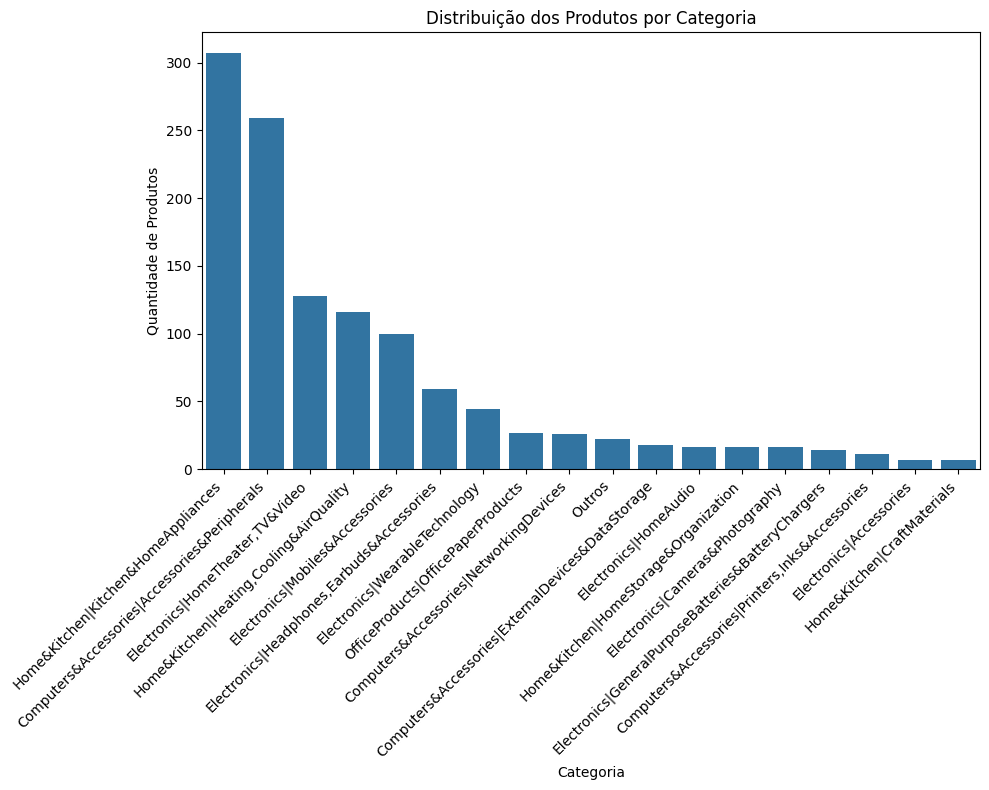

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem de categorias
categoria_counts = base_unificada['category_simplificada'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=categoria_counts.index, y=categoria_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição dos Produtos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Produtos')
plt.tight_layout()
plt.show()


In [ ]:
# Função segura para pegar o primeiro valor da moda (se houver)
def safe_mode(series):
    mode = series.mode()
    return mode.iloc[0] if not mode.empty else None

# Cálculo geral corrigido
tendencia_central = base_unificada[['actual_price', 'discounted_price', 'discount_percentage', 'rating', 'rating_count']].agg(['mean', 'median', safe_mode])

# Exibir
from IPython.display import display
display(tendencia_central)


,actual_price,discounted_price,discount_percentage,rating,rating_count
mean,4843.650981,2698.281794,46.55658,4.084577,14306.624476
median,1699.000000,825.000000,49.00000,4.100000,3842.000000
safe_mode,999.000000,199.000000,50.00000,4.100000,4.000000


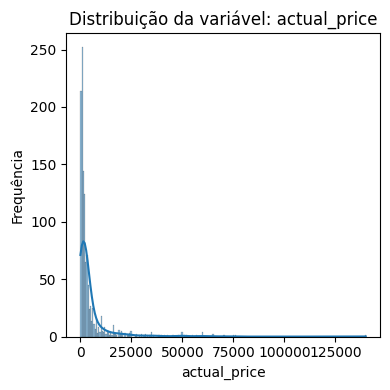

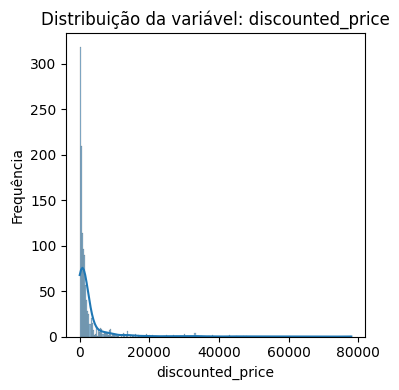

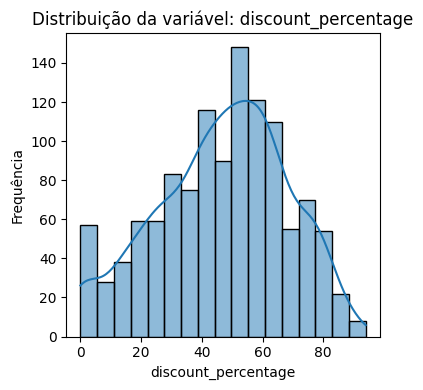

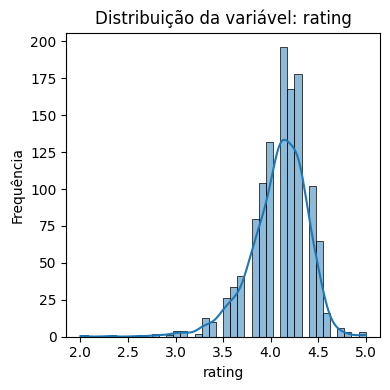

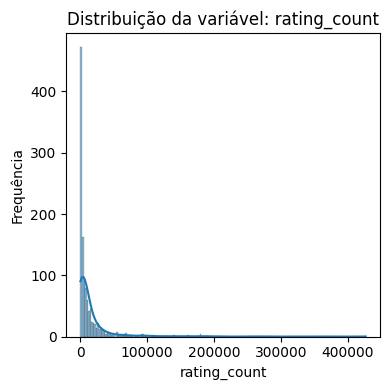

In [ ]:
# Histogramas para cada variável
num_vars = ['actual_price', 'discounted_price', 'discount_percentage', 'rating', 'rating_count']

for col in num_vars:
    plt.figure(figsize=(4, 4))
    sns.histplot(base_unificada[col], kde=True)
    plt.title(f'Distribuição da variável: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

In [ ]:
# Desvio padrão, variância, IQR
dispersao = base_unificada[num_vars].agg(['std', 'var', lambda x: x.quantile(0.75) - x.quantile(0.25)])
dispersao.index = ['Desvio Padrão', 'Variância', 'Intervalo Interquartil (IQR)']
display(dispersao)

,actual_price,discounted_price,discount_percentage,rating,rating_count
Desvio Padrão,1.012598e+04,6.121715e+03,21.459350,0.308787,3.316054e+04
Variância,1.025355e+08,3.747540e+07,460.503717,0.095349,1.099621e+09
Intervalo Interquartil (IQR),3.091000e+03,1.650000e+03,30.000000,0.400000,1.230900e+04


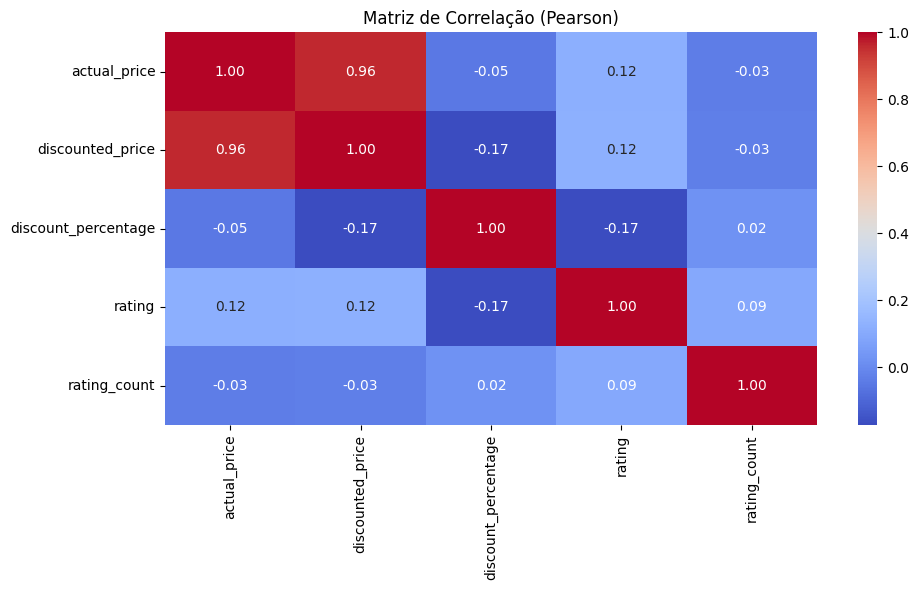

In [ ]:
# Correlação de Pearson + mapa de calor
correlacao = base_unificada[num_vars].corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (Pearson)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Quartis para actual_price
quartis_actual_price = base_unificada['actual_price'].quantile([0, 0.25, 0.5, 0.75, 1]).values
labels_actual_price = ['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto']
base_unificada['faixa_actual_price'] = pd.cut(base_unificada['actual_price'], bins=quartis_actual_price, labels=labels_actual_price, include_lowest=True)

# Quartis para discounted_price
quartis_discounted_price = base_unificada['discounted_price'].quantile([0, 0.25, 0.5, 0.75, 1]).values
labels_discounted_price = ['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto']
base_unificada['faixa_discounted_price'] = pd.cut(base_unificada['discounted_price'], bins=quartis_discounted_price, labels=labels_discounted_price, include_lowest=True)

# Faixas fixas para discount_percentage
bins_discount = [0, 10, 30, 50, 70, 100]
labels_discount = ['0-10%', '10-30%', '30-50%', '50-70%', '70-100%']
base_unificada['faixa_discount_percentage'] = pd.cut(base_unificada['discount_percentage'], bins=bins_discount, labels=labels_discount, include_lowest=True)

# Faixas para rating (notas) considerando valores decimais
def faixa_rating(r):
    if r < 2.5:
        return 'Ruim (1-2)'
    elif 2.5 <= r < 3.5:
        return 'Médio (3)'
    elif 3.5 <= r < 4.5:
        return 'Bom (4)'
    elif r >= 4.5:
        return 'Excelente (5)'
    else:
        return 'Outro'

base_unificada['faixa_rating'] = base_unificada['rating'].apply(faixa_rating)

# Faixas para rating_count por quantis
quantis_rating_count = base_unificada['rating_count'].quantile([0, 0.25, 0.5, 0.75, 1]).values
labels_rating_count = ['Poucas Avaliações', 'Avaliações Moderadas', 'Muitas Avaliações', 'Muitas +']
base_unificada['faixa_rating_count'] = pd.cut(base_unificada['rating_count'], bins=quantis_rating_count, labels=labels_rating_count, include_lowest=True)

# Exibir as primeiras linhas para conferir
base_unificada[['actual_price', 'faixa_actual_price', 'discounted_price', 'faixa_discounted_price', 'discount_percentage', 'faixa_discount_percentage', 'rating', 'faixa_rating', 'rating_count', 'faixa_rating_count']].head()

,actual_price,faixa_actual_price,discounted_price,faixa_discounted_price,discount_percentage,faixa_discount_percentage,rating,faixa_rating,rating_count,faixa_rating_count
0,1099.0,Médio-Baixo,399.00,Médio-Baixo,64,50-70%,4.2,Bom (4),24269,Muitas +
1,2299.0,Médio-Alto,1049.00,Médio-Alto,54,50-70%,3.9,Bom (4),1779,Avaliações Moderadas
2,499.0,Baixo,176.63,Baixo,65,50-70%,4.1,Bom (4),15189,Muitas +
3,550.0,Baixo,522.00,Médio-Baixo,5,0-10%,4.4,Bom (4),12179,Muitas Avaliações
4,1999.0,Médio-Alto,799.00,Médio-Baixo,60,50-70%,3.8,Bom (4),12958,Muitas Avaliações


In [ ]:
# Criar uma nova coluna só com o primeiro nível da categoria
base_unificada['categoria_nivel_1'] = base_unificada['category_simplificada'].apply(lambda x: x.split('|')[0])

# Verificar resultado
base_unificada[['category_simplificada', 'categoria_nivel_1']].head()

,category_simplificada,categoria_nivel_1
0,Computers&Accessories|Accessories&Peripherals,Computers&Accessories
1,Electronics|HomeAudio,Electronics
2,Computers&Accessories|Accessories&Peripherals,Computers&Accessories
3,Outros,Outros
4,Electronics|Cameras&Photography,Electronics


In [ ]:
import pandas as pd
from IPython.display import display

# Funções para formatar os valores
def format_price(valor):
    return f"₹ {valor:,.2f}"

def format_discount(valor):
    return f"{valor:.0f}%"

# Copiar a base para não mexer no original
base_tabela = base_unificada.copy()

# Aplicar as formatações nas colunas desejadas
base_tabela['actual_price'] = base_tabela['actual_price'].apply(format_price)
base_tabela['discounted_price'] = base_tabela['discounted_price'].apply(format_price)
base_tabela['discount_percentage'] = base_tabela['discount_percentage'].apply(format_discount)

# Selecionar e reorganizar as colunas para exibição
colunas_exibir = [
    'product_id', 'category_simplificada',
    'actual_price', 'faixa_actual_price',
    'discounted_price', 'faixa_discounted_price',
    'discount_percentage', 'faixa_discount_percentage',
    'rating', 'faixa_rating',
    'rating_count', 'faixa_rating_count'
]

# Exibir as primeiras 20 linhas
display(base_tabela[colunas_exibir].head(20))

,product_id,category_simplificada,actual_price,faixa_actual_price,discounted_price,faixa_discounted_price,discount_percentage,faixa_discount_percentage,rating,faixa_rating,rating_count,faixa_rating_count
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals,"₹ 1,099.00",Médio-Baixo,₹ 399.00,Médio-Baixo,64%,50-70%,4.2,Bom (4),24269,Muitas +
1,B0B12K5BPM,Electronics|HomeAudio,"₹ 2,299.00",Médio-Alto,"₹ 1,049.00",Médio-Alto,54%,50-70%,3.9,Bom (4),1779,Avaliações Moderadas
2,B08WRWPM22,Computers&Accessories|Accessories&Peripherals,₹ 499.00,Baixo,₹ 176.63,Baixo,65%,50-70%,4.1,Bom (4),15189,Muitas +
3,B00AXHBBXU,Outros,₹ 550.00,Baixo,₹ 522.00,Médio-Baixo,5%,0-10%,4.4,Bom (4),12179,Muitas Avaliações
4,B08MCD9JFY,Electronics|Cameras&Photography,"₹ 1,999.00",Médio-Alto,₹ 799.00,Médio-Baixo,60%,50-70%,3.8,Bom (4),12958,Muitas Avaliações
5,B083RCTXLL,Computers&Accessories|Accessories&Peripherals,"₹ 1,199.00",Médio-Baixo,₹ 681.00,Médio-Baixo,43%,30-50%,4.2,Bom (4),8258,Muitas Avaliações
6,B08HLZ28QC,Computers&Accessories|NetworkingDevices,"₹ 3,490.00",Médio-Alto,"₹ 1,199.00",Médio-Alto,66%,50-70%,4.1,Bom (4),11716,Muitas Avaliações
7,B07GVR9TG7,Computers&Accessories|NetworkingDevices,"₹ 4,999.00",Alto,"₹ 2,499.00",Alto,50%,30-50%,4.4,Bom (4),35024,Muitas +
8,B0856HY85J,"Electronics|Headphones,Earbuds&Accessories","₹ 4,999.00",Alto,"₹ 1,799.00",Médio-Alto,64%,50-70%,4.1,Bom (4),55192,Muitas +
9,B07CD2BN46,"Electronics|Headphones,Earbuds&Accessories",₹ 599.00,Baixo,₹ 429.00,Médio-Baixo,28%,10-30%,4.1,Bom (4),119466,Muitas +


/tmp/ipython-input-66-615792187.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distrib_preco_categoria = base_unificada.groupby(['faixa_actual_price', 'categoria_nivel_1']).size().reset_index(name='quantidade')


,faixa_actual_price,categoria_nivel_1,quantidade
0,Baixo,Computers&Accessories,121
1,Baixo,Electronics,85
2,Baixo,Home&Kitchen,76
3,Baixo,OfficeProducts,26
4,Baixo,Outros,7
5,Médio-Baixo,Computers&Accessories,107
6,Médio-Baixo,Electronics,72
7,Médio-Baixo,Home&Kitchen,107
8,Médio-Baixo,OfficeProducts,0
9,Médio-Baixo,Outros,4


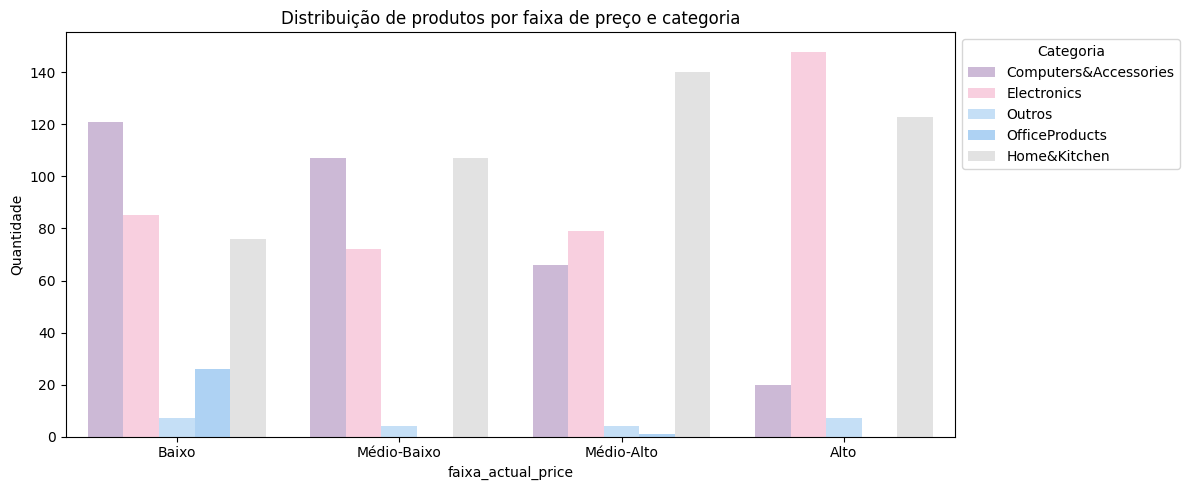

In [ ]:
import pandas as pd

# Tabela de contagem
distrib_preco_categoria = base_unificada.groupby(['faixa_actual_price', 'categoria_nivel_1']).size().reset_index(name='quantidade')

# Exibir
display(distrib_preco_categoria)

# Paleta personalizada com tons pastel de roxo, rosa e azul
cores_personalizadas = ['#CDB4DB',  # Roxo pastel
                        '#FFC8DD',  # Rosa claro
                        '#BDE0FE',  # Azul pastel
                        '#A2D2FF',  # Azul bebê
                        '#E2E2E2']  # Cinza claro (se tiver 5 categorias)

plt.figure(figsize=(12, 5))
sns.countplot(
    data=base_unificada,
    x='faixa_actual_price',
    hue='categoria_nivel_1',
    palette=cores_personalizadas
)
plt.title('Distribuição de produtos por faixa de preço e categoria')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.legend(title='Categoria', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

/tmp/ipython-input-67-1760103596.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_desconto_por_faixa = base_unificada.groupby('faixa_actual_price')['discount_percentage'].mean().reset_index()


,faixa_actual_price,discount_percentage
0,Baixo,41.453968
1,Médio-Baixo,52.317241
2,Médio-Alto,47.168966
3,Alto,45.748322


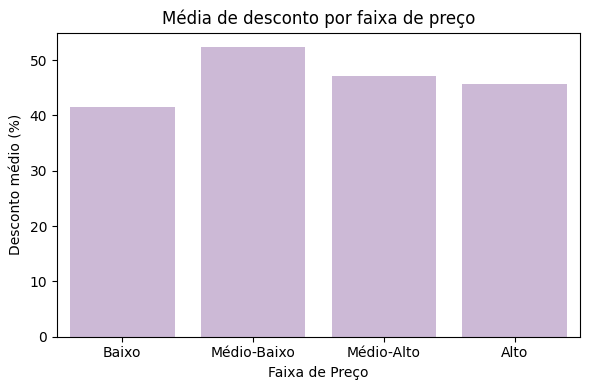

In [ ]:
# Média de desconto por faixa de preço
media_desconto_por_faixa = base_unificada.groupby('faixa_actual_price')['discount_percentage'].mean().reset_index()

# Exibir
display(media_desconto_por_faixa)

# Gráfico com paleta padrão (sem hue)
plt.figure(figsize=(6, 4))
sns.barplot(data=media_desconto_por_faixa, x='faixa_actual_price', y='discount_percentage', color='#CDB4DB')
plt.title('Média de desconto por faixa de preço')
plt.ylabel('Desconto médio (%)')
plt.xlabel('Faixa de Preço')
plt.tight_layout()
plt.show()

/tmp/ipython-input-68-446138277.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_rating_por_faixa = base_unificada.groupby('faixa_actual_price')['rating'].mean().reset_index()


,faixa_actual_price,rating
0,Baixo,4.084762
1,Médio-Baixo,4.077586
2,Médio-Alto,4.061379
3,Alto,4.113758


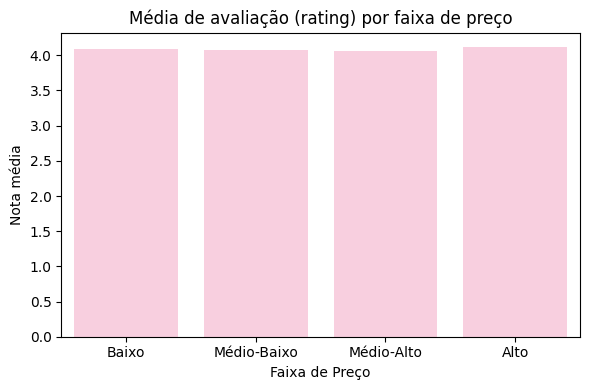

In [ ]:
# Média de rating por faixa de preço
media_rating_por_faixa = base_unificada.groupby('faixa_actual_price')['rating'].mean().reset_index()

# Exibir
display(media_rating_por_faixa)

# Gráfico
plt.figure(figsize=(6, 4))
sns.barplot(data=media_rating_por_faixa, x='faixa_actual_price', y='rating', color='#FFC8DD')
plt.title('Média de avaliação (rating) por faixa de preço')
plt.ylabel('Nota média')
plt.xlabel('Faixa de Preço')
plt.tight_layout()
plt.show()


/tmp/ipython-input-69-532452822.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_rating_count_por_faixa = base_unificada.groupby('faixa_actual_price')['rating_count'].mean().reset_index()


,faixa_actual_price,rating_count
0,Baixo,12497.984127
1,Médio-Baixo,15656.8
2,Médio-Alto,15774.110345
3,Alto,13476.422819


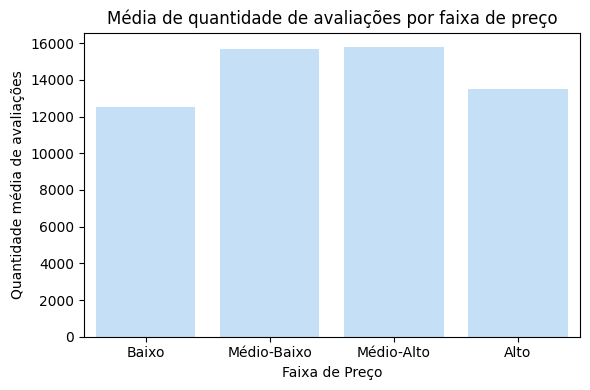

In [ ]:
# Média de quantidade de avaliações por faixa de preço
media_rating_count_por_faixa = base_unificada.groupby('faixa_actual_price')['rating_count'].mean().reset_index()

# Exibir
display(media_rating_count_por_faixa)

# Gráfico
plt.figure(figsize=(6, 4))
sns.barplot(data=media_rating_count_por_faixa, x='faixa_actual_price', y='rating_count', color='#BDE0FE')
plt.title('Média de quantidade de avaliações por faixa de preço')
plt.ylabel('Quantidade média de avaliações')
plt.xlabel('Faixa de Preço')
plt.tight_layout()
plt.show()


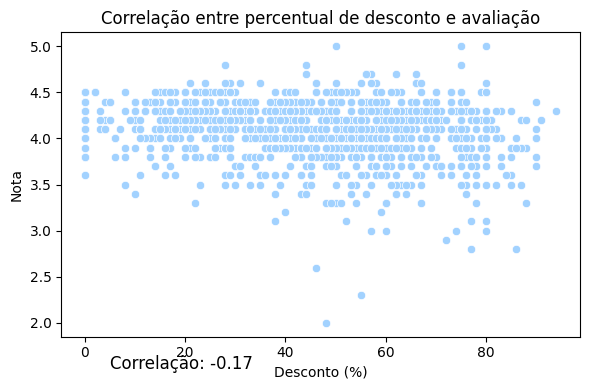

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlação numérica
correlacao = base_unificada[['discount_percentage', 'rating']].corr().iloc[0,1]

# Gráfico de dispersão
plt.figure(figsize=(6, 4))
sns.scatterplot(data=base_unificada, x='discount_percentage', y='rating', color='#A2D2FF')

# Adicionar valor da correlação no gráfico
plt.text(5, 1.5, f'Correlação: {correlacao:.2f}', fontsize=12, color='black')

plt.title('Correlação entre percentual de desconto e avaliação')
plt.xlabel('Desconto (%)')
plt.ylabel('Nota')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 1. Criar variável binária de exposição (ex: desconto ≥ 50%)
base_unificada['desconto_alto'] = base_unificada['discount_percentage'] >= 50

# 2. Criar variável binária de desfecho (ex: nota ≥ 4.5)
base_unificada['nota_alta'] = base_unificada['rating'] >= 4.5

# 3. Calcular incidências
# Expotos
exp = base_unificada[base_unificada['desconto_alto']]
incid_exp = exp['nota_alta'].mean()

# Não expostos
nexp = base_unificada[~base_unificada['desconto_alto']]
incid_nexp = nexp['nota_alta'].mean()

# 4. Risco Relativo
RR = incid_exp / incid_nexp

print(f"Incidência em desconto alto: {incid_exp:.2%}")
print(f"Incidência em desconto baixo: {incid_nexp:.2%}")
print(f"Risco Relativo (RR): {RR:.2f}")

Incidência em desconto alto: 7.31%
Incidência em desconto baixo: 8.26%
Risco Relativo (RR): 0.88
